<H1>MNIST DATASET PRACTISE</H1>
<p>It is an acronym thats stands for the Modified National Institute Of Standards and Technology Dataset. This dataset has around 60000 small squares of 28x28 pixel grayscale images of handwritten digits between 0 to 9. The Idea is to classify these digits.The copyrights for this dataset is held by Yann LeCun and Corinna Cortes.</p> 

In [1]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [2]:
#load the dataset and inspect some of its examples.
import tensorflow 
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = tensorflow.keras.datasets.mnist.load_data()

#reshaping the dataset to convert them into one-hots
X_train= X_train.reshape((X_train.shape[0],28,28,1))
X_test= X_test.reshape((X_test.shape[0],28,28,1))

Y_train= tensorflow.one_hot(Y_train,10)
Y_test= tensorflow.one_hot(Y_test,10)

In [3]:
 #for i in range(1,16,1):
     #plt.subplot(4,4,i)
     #plt.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
     #plt.show()    


In [4]:
#Making the Model
model= tensorflow.keras.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model.add(tensorflow.keras.layers.BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model.add(tensorflow.keras.layers.BatchNormalization())
model.add(Dense(10, activation='softmax'))

#Compile Model
op= SGD(learning_rate= 0.01, momentum=0.9)
model.compile(optimizer= op, loss= 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
#Normalizing Train and Test data
X_train= X_train.astype('float32')/255

X_test= X_test.astype('float32')/255

In [6]:
final= model.fit(X_train, Y_train,batch_size=64, epochs=20)

Epoch 1/20
938/938 [==============================] - 38s 40ms/step - loss: 0.1278 - accuracy: 0.9622
Epoch 2/20
938/938 [==============================] - 38s 40ms/step - loss: 0.0457 - accuracy: 0.9866
Epoch 3/20
938/938 [==============================] - 38s 40ms/step - loss: 0.0265 - accuracy: 0.9925
Epoch 4/20
938/938 [==============================] - 38s 41ms/step - loss: 0.0165 - accuracy: 0.9957
Epoch 5/20
938/938 [==============================] - 38s 41ms/step - loss: 0.0106 - accuracy: 0.9976
Epoch 6/20
938/938 [==============================] - 38s 41ms/step - loss: 0.0066 - accuracy: 0.9990
Epoch 7/20
938/938 [==============================] - 38s 40ms/step - loss: 0.0049 - accuracy: 0.9995
Epoch 8/20
938/938 [==============================] - 39s 41ms/step - loss: 0.0035 - accuracy: 0.9997
Epoch 9/20
938/938 [==============================] - 38s 41ms/step - loss: 0.0027 - accuracy: 0.9998
Epoch 10/20
938/938 [==============================] - 39s 41ms/step - loss: 0.002

In [7]:
#Second Model Making
model_2= Sequential()
model_2.add(Conv2D(32,(3,3), activation='relu',padding='same', input_shape=(28, 28,1)))
model_2.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(10, activation='softmax'))
model_2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                401472    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 411,690
Trainable params: 411,690
Non-trainable params: 0
________________________________________________

In [8]:
final_2=model_2.fit(X_train, Y_train,batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 75s 159ms/step - loss: 0.2071 - accuracy: 0.9391
Epoch 2/20
469/469 [==============================] - 75s 160ms/step - loss: 0.0558 - accuracy: 0.9834
Epoch 3/20
469/469 [==============================] - 76s 161ms/step - loss: 0.0376 - accuracy: 0.9884
Epoch 4/20
469/469 [==============================] - 75s 160ms/step - loss: 0.0274 - accuracy: 0.9912
Epoch 5/20
469/469 [==============================] - 78s 166ms/step - loss: 0.0198 - accuracy: 0.9937
Epoch 6/20
469/469 [==============================] - 75s 161ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 7/20
469/469 [==============================] - 75s 161ms/step - loss: 0.0106 - accuracy: 0.9969
Epoch 8/20
469/469 [==============================] - 76s 161ms/step - loss: 0.0109 - accuracy: 0.9965
Epoch 9/20
469/469 [==============================] - 75s 161ms/step - loss: 0.0085 - accuracy: 0.9971
Epoch 10/20
469/469 [==============================] - 75s 160ms/step - l

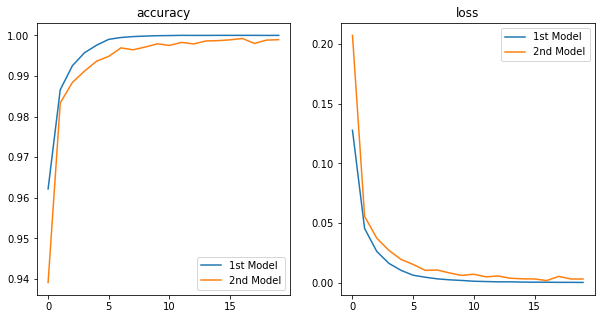

In [15]:
metrics= ['accuracy','loss']
plt.figure(figsize=(10,5))

for i in range(len(metrics)):
    metric= metrics[i]
    
    plt.subplot(1,2,i+1)
    plt.title(metric) 
    plt_result1= final.history[metric]
    plt_result2= final_2.history[metric]
    
    plt.plot(plt_result1, label='1st Model')
    plt.plot(plt_result2, label='2nd Model')
    plt.legend() 
    
plt.show()    

In [10]:
predictions= model.predict(X_test)
predictions_2= model_2.predict(X_test)

4
4


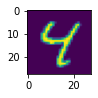

9
9


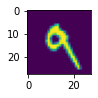

5
5


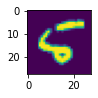

9
9


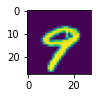

0
0


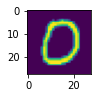

6
6


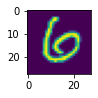

9
9


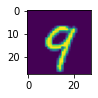

0
0


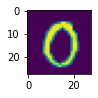

1
1


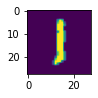

In [17]:
#Show Predictions.
for i in range(1,10,1):
    plt.subplot(3,3,i)
    plt.imshow(X_test[i+5])
    print(np.argmax(predictions[i+5]))
    print(np.argmax(predictions_2[i+5]))
    plt.show()

<H1> Result </H1>
<p>Accuracy for Model_1= 100%</p>
<p>Accuracy for Model_2= 99.89%</p>